200.0


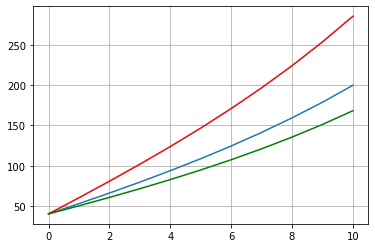

In [1]:
#shooting method
from pylab import plot,show,grid,scatter
from copy import deepcopy
n=11 #no of steps we are taking+1 or range of no.of points in thearrey we are taking as (x,y)coordinates.
h=10/(n-1) #step of the graph or least count of the graph
x=[h*i for i in range(n)] # coordinate along length of the rod
t=[0.0 for i in range(n)] #temparature coordinate of the rod along the length
ta=20 #temparature of surrounding in degrees celcius
z=deepcopy(t) #slope of the temparature and length
t[n-1]=200; t[0]=40 #boundary values of the temperature of the rod
h1=0.01 #the heat transfer coeffeciant
def f(k):
  from copy import deepcopy
  v=4 #order of ranga kutta method
  g=deepcopy(t)
  # print(g)
  vx=deepcopy(z)
  k=vx[0]
  r=[0.0 for i in range(2*v)] #slopes involved in rangakuttamethodand 4 multiplied due to we are finding for vx,vy,x,y
  def a(p):
    o=h1*(p-ta)
    return(o)
#r[0],r[2],r[4],r[6] are for calculating vx
#r[1],r[3],r[5],r[7] are for calculating g
  for i in range(n-1):
    r[0]=h*a(g[i])
    r[1]=h*vx[i]
    r[2]=h*a(g[i]+(r[1]/2))
    r[3]=h*(vx[i]+(r[0]/2))
    r[4]=h*a(g[i]+(r[3]/2))
    r[5]=h*(vx[i]+(r[2]/2))
    r[6]=h*a(g[i]+(r[5]))
    r[7]=h*(vx[i]+r[4])
    vx[i+1]=vx[i]+(1/6)*(r[0]+2*r[2]+2*r[4]+r[6])
    g[i+1]=g[i]+(1/6)*(r[1]+2*r[3]+2*r[5]+r[7])
  return(g)
z[0]=20 #guess point 1
p1=z[0]
l=f(z[0])
# print(l)
z[0]=10 #guess point 2
p2=z[0]
m=f(z[0])
# print(m)
z[0]=p2+((p1-p2)/(l[n-1]-m[n-1]))*(t[n-1]-m[n-1]) #linear interpolation
u=f(z[0])
print(u[n-1]) #final point got by numerical method
plot(x,u)
plot(x,l,color="red")
plot(x,m,color="green")
grid()

[2.01, -1, 0, 0, 0, 0, 0, 0, 0]
[-1, 2.01, -1, 0, 0, 0, 0, 0, 0]
[0, -1, 2.01, -1, 0, 0, 0, 0, 0]
[0, 0, -1, 2.01, -1, 0, 0, 0, 0]
[0, 0, 0, -1, 2.01, -1, 0, 0, 0]
[0, 0, 0, 0, -1, 2.01, -1, 0, 0]
[0, 0, 0, 0, 0, -1, 2.01, -1, 0]
[0, 0, 0, 0, 0, 0, -1, 2.01, -1]
[0, 0, 0, 0, 0, 0, 0, -1, 2.01]
[40, 52.744842706261196, 65.83167440118517, 79.39576198678775, 93.57487645578884, 108.51070413079752, 124.35050702175333, 141.24900371325182, 159.37043338172796, 178.8907628764816, 200]


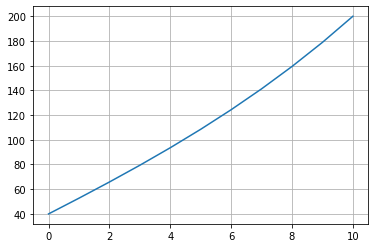

In [2]:
                        #finite differene method
from pylab import plot,show,grid,scatter
from copy import deepcopy
import random
n=11     #no of steps we are taking+1 or range of no.of points in the arrey we are taking as (x,y)coordinates.
h=10/(n-1) #step of the graph or least count of the graph
x1=[h*i for i in range(n)] # coordinate along length of the rod
t=[0.0 for i in range(n)] #temparature coordinate of the rod along the length
ta=20  #temparature of surrounding in degrees celcius
z=deepcopy(t) #slope of the temparature and length
t[n-1]=200; t[0]=40 #boundary values of the temperature of the rod
h1=0.01 #the heat transfer coeffeciant
# for i in range(n-2):
#   if i=1:
#     t[i+2]=(2+h1*h**2)*t[i+1]-(h1*h**2*ta)-t[i]
# print(2+h1*h**2,h1*h**2*ta)
b1=[0.0 for i in range(n-2)]
for i in range(n-2):
  if i==0:
    b1[i]=(h1*(h**2)*ta)+t[0]
  elif i==n-3:
    b1[i]=(h1*(h**2)*ta)+t[n-1]
  else:
    b1[i]=(h1*(h**2)*ta)
A=[[0.0 for i in range(n-2)] for j in range(n-2)]
for i in range(n-2):
  for j in range(n-2):
    if i==j:
      A[i][j]=2+(h1*(h**2))
    elif i==j+1 or i==j-1:
      A[i][j]=-1
    else:
      A[i][j]=0
O=deepcopy(A)
for i in range(n-2):
  O[i].append(b1[i])
  print(A[i])
augumentend_matrix=O
# print(O);print(A);print(b1)
# implimenting elimination method
def f2(k):
    #   Q1) CODE FOR GAUESS SEIDEL METHOD                    
  l1=len(b1);f=0;m=1
  a1=k # augumented matrix
  
  x=[[0.0 for i in range(m)]for i in range(n)]
  c=deepcopy(x)
  a=[00 for _ in range(l1)]
  b=deepcopy(x)
  l2=0.003;l3=1;count=0;s=0;p=l1
  while p>0:
      for i in range(l1):
          for k in range(l1):
              if k!=i:
                s+=a1[i][k]
          if(a1[i][i]<abs(s)):
              # print(a1)
              a1=random.sample(a1,l1)
              # print(a1,i,end="\n\n")
          else:
              if(a[i]==0):
                  a[i]=a1[i].copy();p=p-1
          s=0
  for i in range(l1):b[i][0]=a[i].pop(l1)
  # print("a:",a)
  # print("b:",b)
  while l3:
      count+=1
      for i in range(l1):
          if a[i][i]==0: sys.quit()
          for j in range(m):
              x[i][j]=b[i][j]
              for k in range(l1):
                  if k!=i:
                      x[i][j]-=a[i][k]*x[k][j]
              x[i][j]/=a[i][i]
              # print(c,x,abs((c[i][j]-x[i][j])/x[i][j]),sep="\n",end="\n\n")
              if(abs((c[i][j]-x[i][j])/x[i][j])*100<l2):l3=0;break
              else:c[i][j]=x[i][j]
  return(x)
y=f2(O)
for i in range(n-2):
  t[i+1]=y[i][0]
print(t)
plot(x1,t)
grid()



















     



